<a href="https://colab.research.google.com/github/FuriouStyles/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/Stephen_P_LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


### First we need to load and clean the dataset, and then seperate them into GOP and Dem votes


In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data')

In [3]:
cols = ['Class Name', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa']

df.columns = cols
df = df.replace({'?': np.NaN, 'y': 1, 'n': 0})

gop_votes = df[df['Class Name'] == 'republican']
dem_votes = df[df['Class Name'] == 'democrat']

gop_votes.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
6,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
9,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0
10,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,NaN,NaN


In [4]:
dem_votes.count()[0], gop_votes.count()[0] #Democrats control this congress

(267, 167)

#### Let's try and get everything done inside a function for all bills!

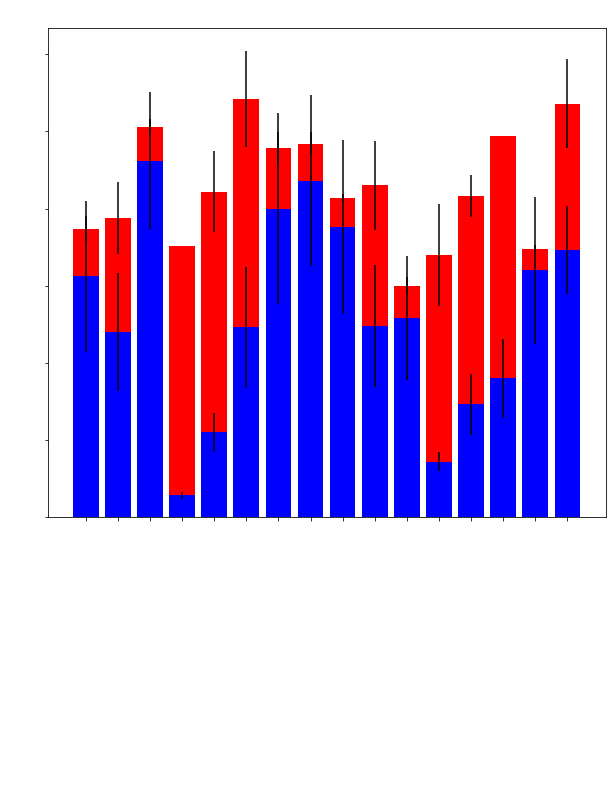

In [5]:
def plot_all_votes(frame):
  gop_votes = df[df['Class Name'] == 'republican'].drop(columns='Class Name')
  dem_votes = df[df['Class Name'] == 'democrat'].drop(columns='Class Name')
  gop_error = []
  dem_error = []
  gop_yes = []
  dem_yes = []
  columns = list(frame)
  del columns[0]
  def get_conf(vote_frame, error_list, yes_list):
    for col in vote_frame:
      samp_size = 40
      sample = vote_frame[col].sample(samp_size)
      samp_mean = sample.mean()
      samp_std = np.std(sample, ddof=1)
      standard_error = samp_std/np.sqrt(samp_size)
      t = 1.984 #the assigment doesn't specify the confidence interval we need to find so I choose 95%
      conf_low = samp_mean - t*standard_error
      conf_high = samp_mean + t*standard_error
      error_list.append(abs(conf_high - conf_low)*vote_frame[col].sum())
      yes_list.append(vote_frame[col].sum())
  
  get_conf(gop_votes, gop_error, gop_yes)
  get_conf(dem_votes, dem_error, dem_yes)
  
  fig = plt.figure(figsize=(10, 9))
  dem_plot = plt.bar(columns, dem_yes, yerr=dem_error, color='b')
  gop_plot = plt.bar(columns, gop_yes, yerr=gop_error, bottom=dem_yes, color='r')
  plt.xticks(rotation=90, color='white', fontsize=14)
  plt.yticks(color='white', fontsize=16, fontweight='bold')
  plt.title('House Voting Records on Select Bills, 1984', color='white', fontweight='bold', fontsize=20)
  
plot_all_votes(df)

### Chi Squared Tests

####Let's use the Instacart data from Sprint 2/Module 1 :)

We're going to try and determine that the order volume of the two most popular products during each half of the day is not simply by chance!


In [27]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-10-11 21:18:28--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.82.108
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.82.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  32.2MB/s    in 6.4s    

2019-10-11 21:18:35 (30.5 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [28]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)

In [0]:
order_products_prior = pd.read_csv('instacart_2017_05_01/order_products__prior.csv')
order_products_train = pd.read_csv('instacart_2017_05_01/order_products__train.csv')
orders = pd.read_csv('instacart_2017_05_01/orders.csv')
products = pd.read_csv('instacart_2017_05_01/products.csv')

In [0]:
order_products = pd.concat([order_products_prior, order_products_train])

In [36]:
merged = (products[['product_id', 'product_name']]
          .merge(order_products[['order_id', 'product_id']])
          .merge(orders[['order_id', 'order_hour_of_day']]))
merged.head()

,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
4,9007,Frosted Flakes,1107,11


**We're fast-forwarding to a dataset that contains the data we need to make sure we're going over exactly what we need to go over in this data set.**




In [39]:
two_most_pop = merged[(merged['product_name'] == 'Half Baked Frozen Yogurt') | (merged['product_name'] == 'Half And Half Ultra Pasteurized')]
two_most_pop.head()

,product_id,product_name,order_id,order_hour_of_day
25086,30668,Half Baked Frozen Yogurt,595220,21
29409,30668,Half Baked Frozen Yogurt,3252348,16
33914,30668,Half Baked Frozen Yogurt,677455,17
34412,30668,Half Baked Frozen Yogurt,1821824,14
35652,30668,Half Baked Frozen Yogurt,1225489,17


In [41]:
two_most_pop_ct = pd.crosstab(two_most_pop['product_name'], two_most_pop['order_hour_of_day'], margins=True)
two_most_pop_ct

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
product_name,,,,,,,,,,,,,,,,,,,,,,,,,
Half And Half Ultra Pasteurized,6,1,1,0,1,4,25,95,323,480,429,292,200,213,215,222,218,111,56,28,32,23,12,8,2995
Half Baked Frozen Yogurt,16,8,8,3,2,10,18,59,89,128,176,202,194,235,252,284,275,253,255,198,147,86,49,36,2983
All,22,9,9,3,3,14,43,154,412,608,605,494,394,448,467,506,493,364,311,226,179,109,61,44,5978


**NOW WE'RE COOKING WITH OIL!**

In [0]:
row_sums = two_most_pop_ct.iloc[0:2, 24].values
col_sums = two_most_pop_ct.iloc[2, 0:24].values
total = two_most_pop_ct.loc['All', 'All']

In [49]:
# Expected value calculation

expected = []

for row_sum in row_sums:
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sum/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)
print(expected.shape, expected)

(2, 24) [[ 11.02208096   4.50903312   4.50903312   1.50301104   1.50301104
    7.01405152  21.54315825  77.15456674 206.41351623 304.61023754
  303.1072265  247.495818   197.39544998 224.44964871 233.96871863
  253.50786216 246.99481432 182.36533958 155.81214453 113.22683172
   89.67965875  54.60940114  30.56122449  22.04416193]
 [ 10.97791904   4.49096688   4.49096688   1.49698896   1.49698896
    6.98594848  21.45684175  76.84543326 205.58648377 303.38976246
  301.8927735  246.504182   196.60455002 223.55035129 233.03128137
  252.49213784 246.00518568 181.63466042 155.18785547 112.77316828
   89.32034125  54.39059886  30.43877551  21.95583807]]


In [51]:
observed = pd.crosstab(two_most_pop['product_name'], two_most_pop['order_hour_of_day']).values
print(observed.shape)
observed

(2, 24)


array([[  6,   1,   1,   0,   1,   4,  25,  95, 323, 480, 429, 292, 200,
        213, 215, 222, 218, 111,  56,  28,  32,  23,  12,   8],
       [ 16,   8,   8,   3,   2,  10,  18,  59,  89, 128, 176, 202, 194,
        235, 252, 284, 275, 253, 255, 198, 147,  86,  49,  36]])

In [53]:
chi_square = ((observed - expected)**2/(expected)).sum()
chi_square

969.2159421635414

In [0]:
import scipy.stats as stats

chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

In [55]:
print(chi_squared, p_value, dof, expected)

969.2159421635414 4.655863868220678e-190 23 [[ 11.02208096   4.50903312   4.50903312   1.50301104   1.50301104
    7.01405152  21.54315825  77.15456674 206.41351623 304.61023754
  303.1072265  247.495818   197.39544998 224.44964871 233.96871863
  253.50786216 246.99481432 182.36533958 155.81214453 113.22683172
   89.67965875  54.60940114  30.56122449  22.04416193]
 [ 10.97791904   4.49096688   4.49096688   1.49698896   1.49698896
    6.98594848  21.45684175  76.84543326 205.58648377 303.38976246
  301.8927735  246.504182   196.60455002 223.55035129 233.03128137
  252.49213784 246.00518568 181.63466042 155.18785547 112.77316828
   89.32034125  54.39059886  30.43877551  21.95583807]]
